In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [2]:
from numpy.random import default_rng
rg = default_rng(12345)
X = rg.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

In [3]:
slope = 0.25
intercept = -1.25
y = slope * X + rg.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

Text(0, 0.5, 'y')

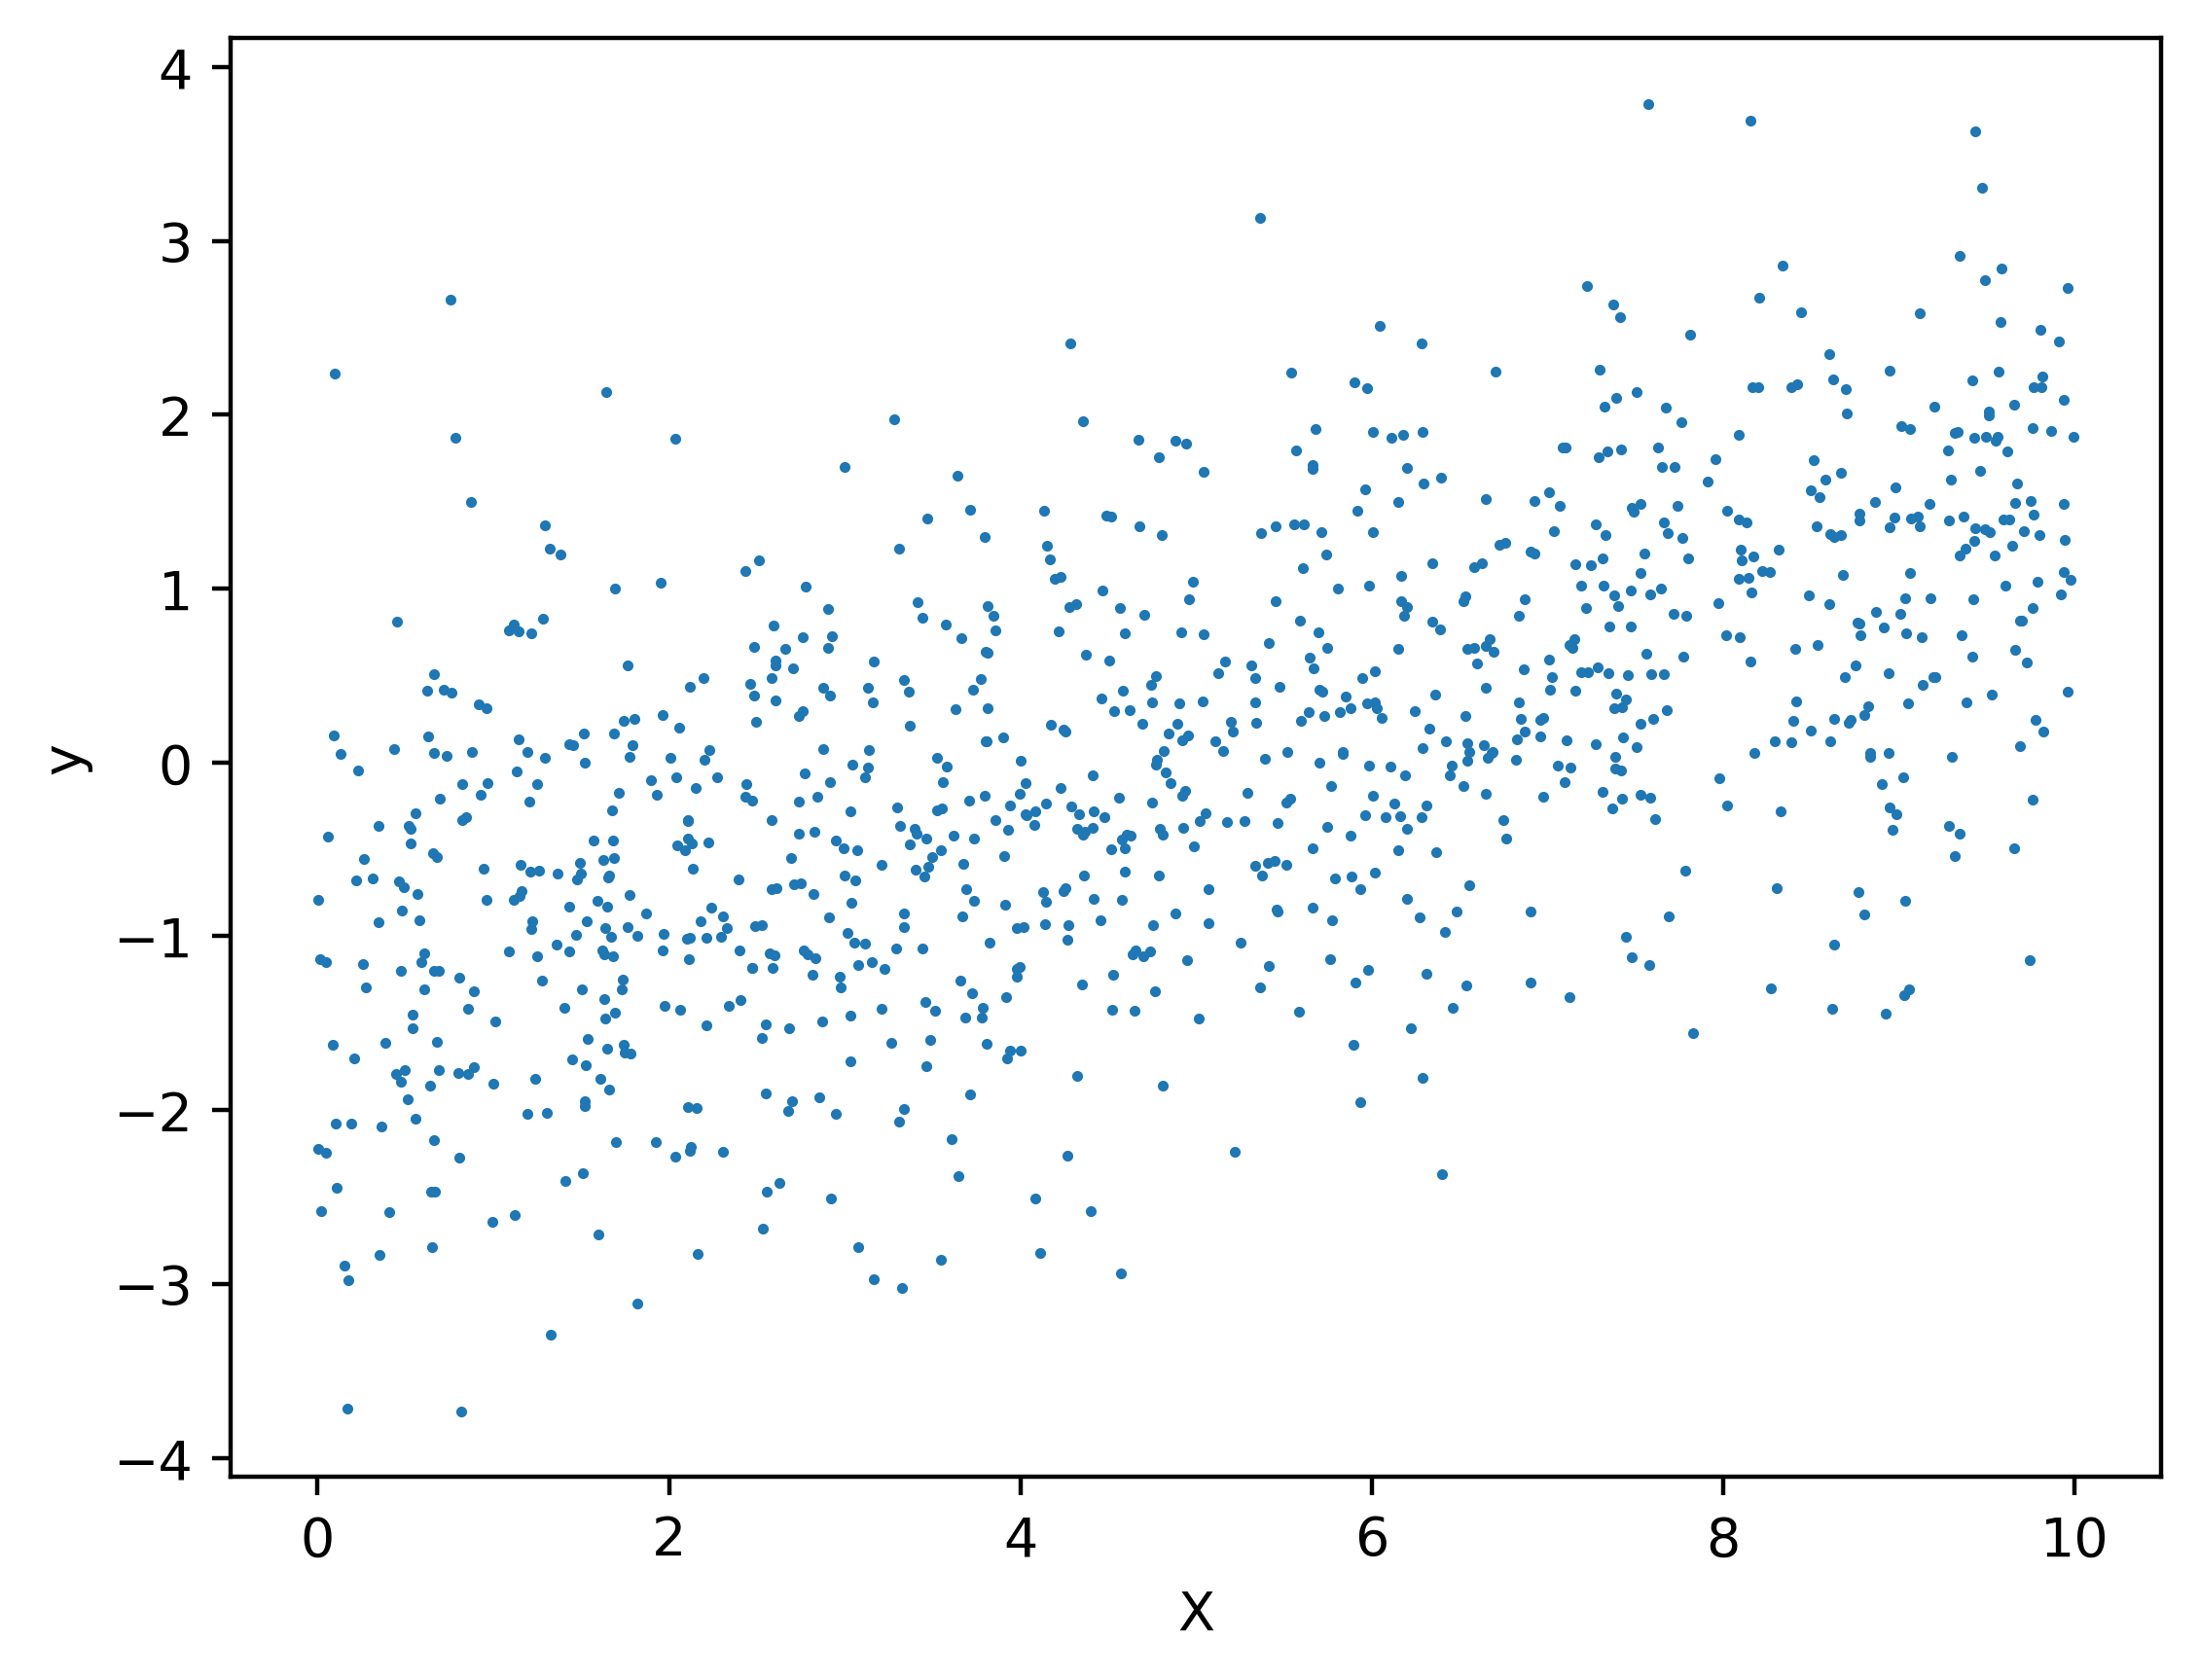

In [4]:
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 400
plt.scatter(X,y,s=1)
plt.xlabel('X')
plt.ylabel('y')

In [5]:
type(X)

numpy.ndarray

In [6]:
pip install numpy==1.19.2

Note: you may need to restart the kernel to use updated packages.


In [7]:
print(np.__version__)

1.19.2


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [10]:
lin_reg

LinearRegression()

In [11]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.2522197212675905
[0.25711689]


In [12]:
y_pred = lin_reg.predict(X.reshape(-1,1))

Text(0, 0.5, 'y')

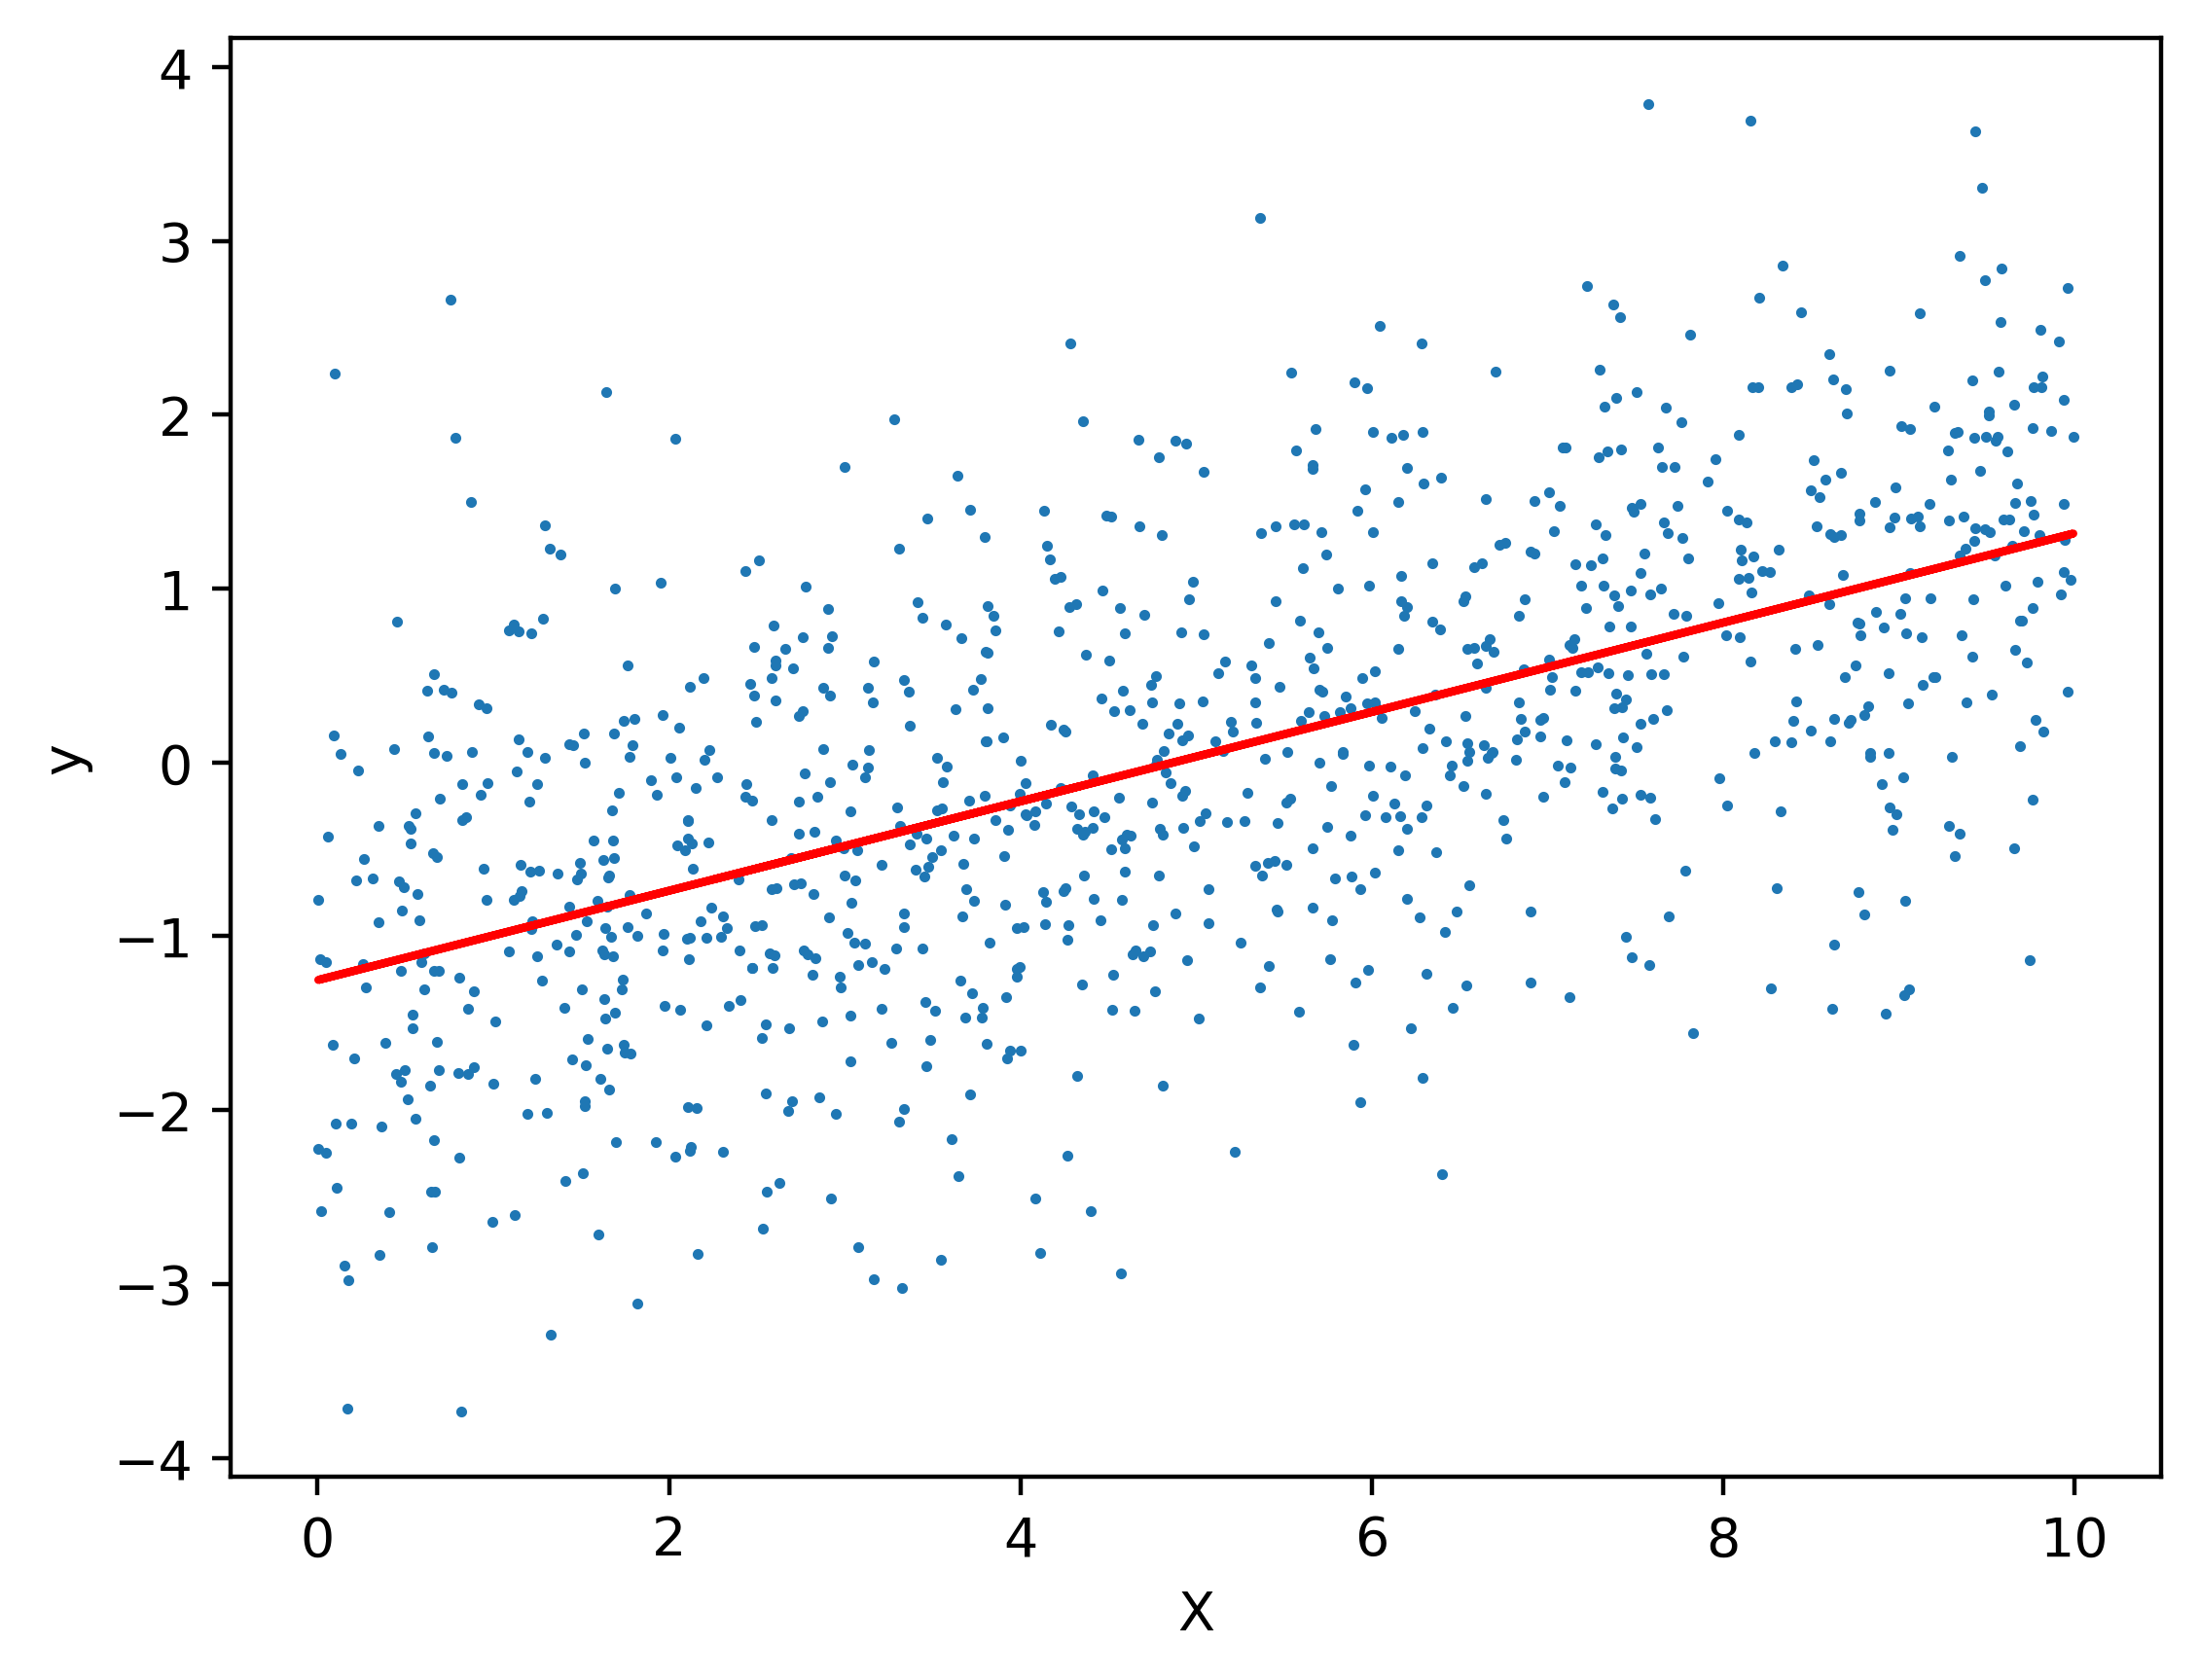

In [13]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')
plt.xlabel('X')
plt.ylabel('y')

# Splitting the data: Training and test sets

In [14]:
import pandas as pd
import matplotlib.pyplot as plt #import plotting package
#render plotting automatically
%matplotlib inline
import matplotlib as mpl #additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high resolution figures
mpl.rcParams['font.size'] = 4 #font size for figures
from scipy import stats
import numpy as np
df = pd.read_csv(r'C:\Users\gabri\OneDrive\Documentos\Data Science Projects with Python\df_clean_2.csv')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1),df['default payment next month'].values, \
                                                    test_size=0.2, random_state=24)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [17]:
np.mean(y_train)

0.223102526838873

In [18]:
np.mean(y_test)

0.21657603600225014

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, \
                                multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [21]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [22]:
y_pred = example_lr.predict(X_test)

In [23]:
is_correct = y_pred == y_test

In [24]:
np.mean(is_correct)

0.7834239639977498

In [25]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [26]:
from sklearn import metrics

In [27]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498